In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Pandas görüntüleme ayarları (Tüm sütunları görebilmek için)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
def load_data():
    print("Veri seti yükleniyor... Bu işlem dosya boyutuna göre biraz zaman alabilir.")
    # Veri seti genellikle iki sheet'ten oluşur. Biz güncel olan 2010-2011 yılını alalım.
    # Eğer dosya ismin farklıysa aşağıdaki kısmı güncellemelisin.
    df = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
    return df

In [4]:
# Datayı yükle
df = load_data()

Veri seti yükleniyor... Bu işlem dosya boyutuna göre biraz zaman alabilir.


In [6]:
print("\n--- İLK 5 SATIR ---")
print(df.head())



--- İLK 5 SATIR ---
  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   2.55     17850.00  United Kingdom
1  536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   3.39     17850.00  United Kingdom
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   2.75     17850.00  United Kingdom
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   3.39     17850.00  United Kingdom
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   3.39     17850.00  United Kingdom


In [7]:
print("\n--- VERİ SETİ BİLGİSİ (Null Değerler & Veri Tipleri) ---")
print(df.info())


--- VERİ SETİ BİLGİSİ (Null Değerler & Veri Tipleri) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [8]:
print("\n--- İSTATİSTİKSEL ÖZET (Aykırı Değer Kontrolü) ---")
# describe() ile negatif değerlere (iadeler) ve max değerlere (uç noktalar) bakıyoruz.
print(df.describe().T)


--- İSTATİSTİKSEL ÖZET (Aykırı Değer Kontrolü) ---
                count                           mean                  min                  25%                  50%                  75%                  max     std
Quantity    541910.00                           9.55            -80995.00                 1.00                 3.00                10.00             80995.00  218.08
InvoiceDate    541910  2011-07-04 13:35:22.342307584  2010-12-01 08:26:00  2011-03-28 11:34:00  2011-07-19 17:17:00  2011-10-19 11:27:00  2011-12-09 12:50:00     NaN
Price       541910.00                           4.61            -11062.06                 1.25                 2.08                 4.13             38970.00   96.76
Customer ID 406830.00                       15287.68             12346.00             13953.00             15152.00             16791.00             18287.00 1713.60


In [9]:
print("\n--- EKSİK DEĞER SAYISI ---")
print(df.isnull().sum())


--- EKSİK DEĞER SAYISI ---
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [10]:
# --- ADIM 1: Veri Temizliği (Data Cleaning) ---

print(f"Temizlik Öncesi Satır Sayısı: {df.shape[0]}")

Temizlik Öncesi Satır Sayısı: 541910


In [11]:
# 1. Customer ID'si boş olanları siliyoruz (Kalıcı olarak)
df.dropna(subset=['Customer ID'], inplace=True)

In [12]:
# 2. İadeleri (Invoice kodu 'C' ile başlayanlar) filtreliyoruz
# Invoice sütununu string'e çevirip bakmak garanti olur.
df = df[~df['Invoice'].astype(str).str.contains('C', na=False)]

In [13]:
# 3. Mantıksız değerleri (Negatif miktar veya 0 fiyat) temizliyoruz
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [14]:
# --- ADIM 2: Feature Engineering (Özellik Mühendisliği) ---

# Her sipariş kalemi için toplam tutarı hesaplıyoruz
df['TotalPrice'] = df['Quantity'] * df['Price']

In [15]:
print(f"Temizlik Sonrası Satır Sayısı: {df.shape[0]}")

Temizlik Sonrası Satır Sayısı: 397885


In [16]:
# --- KONTROL ---
print("\n--- TEMİZLENMİŞ VERİ İSTATİSTİKLERİ ---")
print(df.describe().T)


--- TEMİZLENMİŞ VERİ İSTATİSTİKLERİ ---
                count                           mean                  min                  25%                  50%                  75%                  max     std
Quantity    397885.00                          12.99                 1.00                 2.00                 6.00                12.00             80995.00  179.33
InvoiceDate    397885  2011-07-10 23:41:56.419316992  2010-12-01 08:26:00  2011-04-07 11:12:00  2011-07-31 14:39:00  2011-10-20 14:33:00  2011-12-09 12:50:00     NaN
Price       397885.00                           3.12                 0.00                 1.25                 1.95                 3.75              8142.75   22.10
Customer ID 397885.00                       15294.42             12346.00             13969.00             15159.00             16795.00             18287.00 1713.14
TotalPrice  397885.00                          22.40                 0.00                 4.68                11.80              

In [17]:
import datetime as dt

In [18]:
# --- ADIM 3.1: RFM Metriklerinin Hesaplanması ---

# Analiz tarihini belirliyoruz (Verideki son tarihten 2 gün sonrası)
today_date = dt.datetime(2011, 12, 11)

In [19]:
# Groupby ile her müşteri için metrikleri çıkarıyoruz
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days, # Recency (Gün farkı)
    'Invoice': lambda num: num.nunique(),                       # Frequency (Fatura sayısı)
    'TotalPrice': lambda price: price.sum()                     # Monetary (Toplam harcama)
})

In [20]:
# Sütun isimlerini düzeltelim
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [21]:
# Monetary değeri 0 olanları (varsa) filtreleyelim
rfm = rfm[rfm["Monetary"] > 0]

In [22]:
# --- ADIM 3.2: RFM Skorlarının Oluşturulması (1-5 Puanlama) ---

# Recency: Düşük olması iyidir (Az gün geçmiş). O yüzden etiketler [5, 4, 3, 2, 1]
rfm["Recency_Score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [24]:
# Frequency: Yüksek olması iyidir. Etiketler [1, 2, 3, 4, 5]
# rank(method='first') kullanıyoruz çünkü aynı sayıdaki frekanslar çakışma yapabilir.
rfm["Frequency_Score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [25]:
# Monetary: Yüksek olması iyidir. Etiketler [1, 2, 3, 4, 5]
rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [26]:
# RF Skorunu oluşturma (Müşteri segmentasyonu genelde R ve F üzerinden yapılır)
rfm["RF_SCORE"] = (rfm['Recency_Score'].astype(str) + 
                   rfm['Frequency_Score'].astype(str))

In [27]:
# --- ADIM 3.3: Müşteri Segmentlerinin İsimlendirilmesi (Regex Map) ---

# Bu harita standart literatürdür. R ve F skorlarına göre isim verir.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',      # Uykuda (Eski ve az alışveriş yapan)
    r'[1-2][3-4]': 'At_Risk',          # Riskli (Eski ama sık alışveriş yapmıştı)
    r'[1-2]5': 'Cant_Loose',           # Kaybedilemez (Çok para kazandırmış ama gitmiş)
    r'3[1-2]': 'About_to_Sleep',       # Uyumak üzere
    r'33': 'Need_Attention',           # Dikkat lazım
    r'[3-4][4-5]': 'Loyal_Customers',  # Sadık Müşteriler
    r'41': 'Promising',                # Umut Vaat Eden
    r'51': 'New_Customers',            # Yeni Müşteriler
    r'[4-5][2-3]': 'Potential_Loyal',  # Potansiyel Sadık
    r'5[4-5]': 'Champions'             # Şampiyonlar (Yeni ve Sık alanlar)
}

In [28]:
rfm['Segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [29]:
# Sonucu Görelim
print(rfm[["Recency", "Frequency", "Monetary", "RF_SCORE", "Segment"]].head(10))

             Recency  Frequency  Monetary RF_SCORE          Segment
Customer ID                                                        
12346.00         326          1  77183.60       11      Hibernating
12347.00           3          7   4310.00       55        Champions
12348.00          76          4   1797.24       24          At_Risk
12349.00          19          1   1757.55       41        Promising
12350.00         311          1    334.40       11      Hibernating
12352.00          37          8   2506.04       35  Loyal_Customers
12353.00         205          1     89.00       11      Hibernating
12354.00         233          1   1079.40       11      Hibernating
12355.00         215          1    459.40       11      Hibernating
12356.00          23          3   2811.43       43  Potential_Loyal


In [30]:
# Segmentlerin Dağılımına Bakalım (Rapor için kritik veriler burada)
print("\n--- SEGMENT ANALİZİ ---")
print(rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"]))


--- SEGMENT ANALİZİ ---
                Recency       Frequency       Monetary      
                   mean count      mean count     mean count
Segment                                                     
About_to_Sleep    53.31   352      1.16   352   471.99   352
At_Risk          153.79   593      2.88   593  1084.54   593
Cant_Loose       132.97    63      8.38    63  2796.16    63
Champions          6.36   633     12.41   633  6857.96   633
Hibernating      217.61  1071      1.10  1071   488.64  1071
Loyal_Customers   33.61   819      6.48   819  2864.25   819
Need_Attention    52.43   187      2.33   187   897.63   187
New_Customers      7.43    42      1.00    42   388.21    42
Potential_Loyal   17.40   484      2.01   484  1041.22   484
Promising         23.51    94      1.00    94   294.01    94


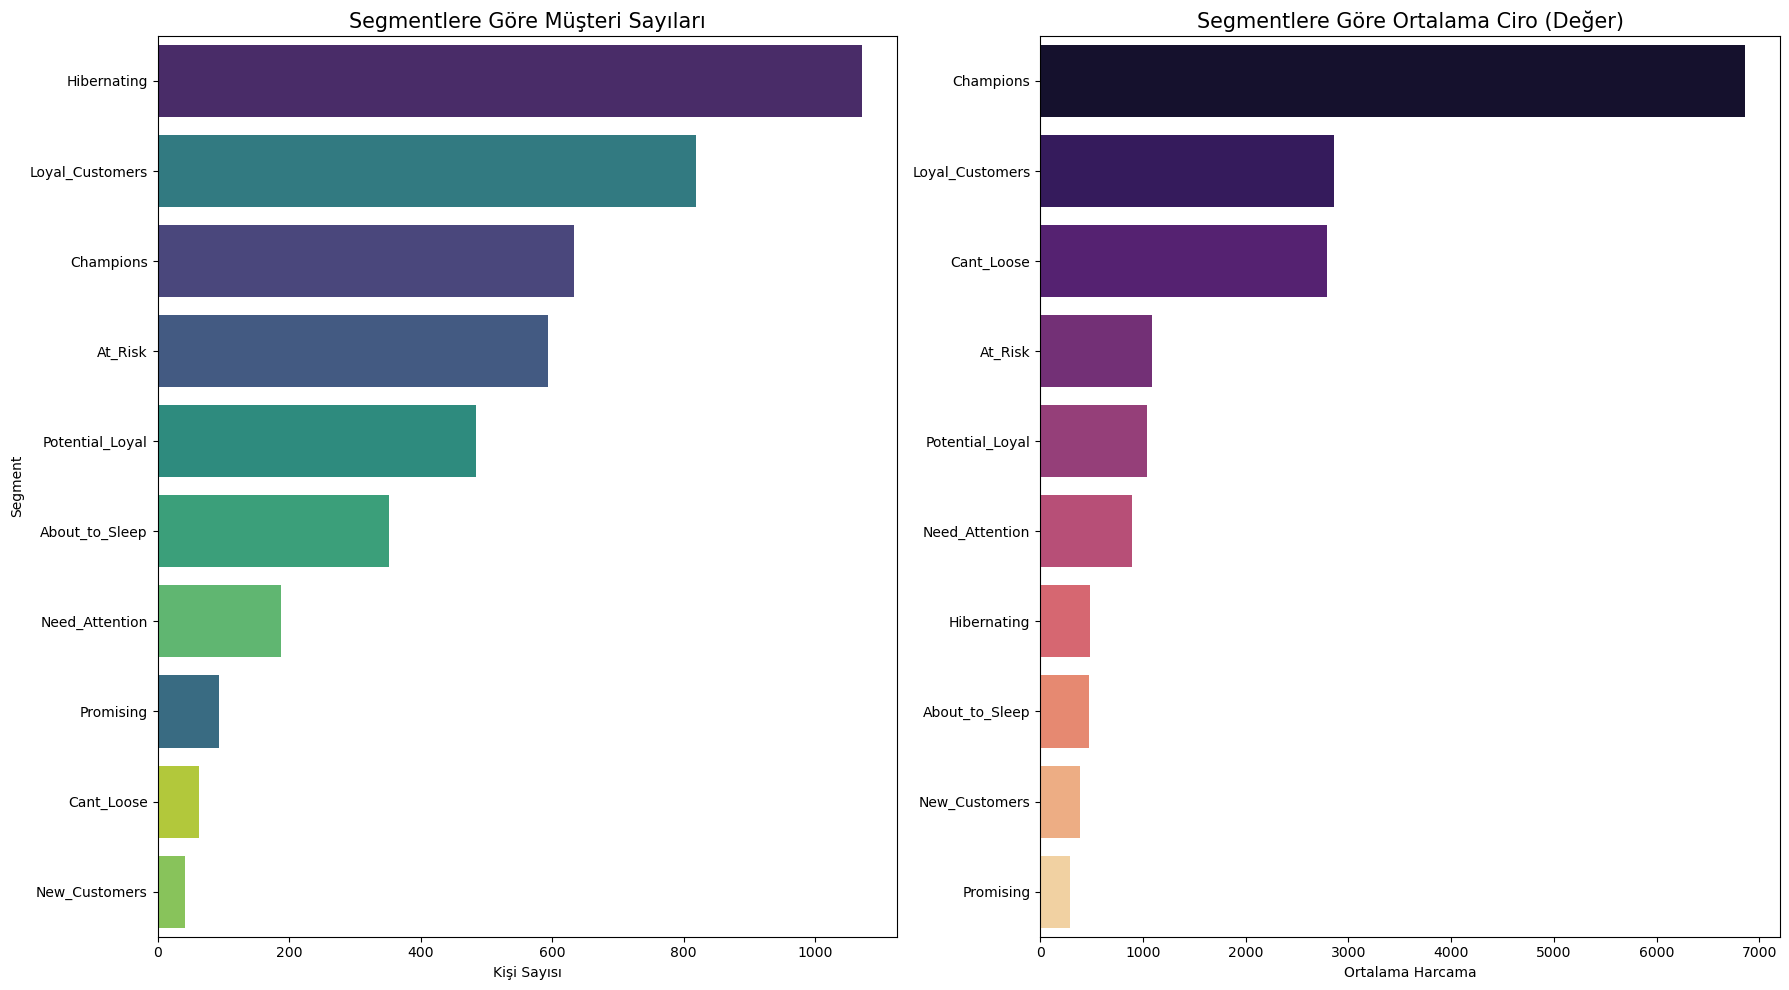

In [37]:
# Tuvali (fig) ve yan yana 2 ekseni (ax) baştan yaratıyoruz
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# GRAFİK 1: Müşteri Sayıları (Sol Eksen: ax[0])
sns.countplot(
    y="Segment", 
    data=rfm, 
    order=rfm['Segment'].value_counts().index, 
    palette="viridis",
    hue="Segment",   # DÜZELTME: Renklendirme kriterini açıkça belirttik
    legend=False,    # DÜZELTME: Gereksiz lejantı kapattık
    ax=ax[0]
)
ax[0].set_title("Segmentlere Göre Müşteri Sayıları", fontsize=15)
ax[0].set_xlabel("Kişi Sayısı")
ax[0].set_ylabel("Segment")

# GRAFİK 2: Ortalama Ciro (Sağ Eksen: ax[1])
summary = rfm.groupby("Segment")["Monetary"].mean().sort_values(ascending=False).reset_index()
sns.barplot(
    y="Segment", 
    x="Monetary", 
    data=summary, 
    palette="magma", 
    hue="Segment",   # DÜZELTME: Renklendirme kriterini açıkça belirttik
    legend=False,    # DÜZELTME: Gereksiz lejantı kapattık
    ax=ax[1]
)
ax[1].set_title("Segmentlere Göre Ortalama Ciro (Değer)", fontsize=15)
ax[1].set_xlabel("Ortalama Harcama")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()